<a href="https://colab.research.google.com/github/Shivamb2203/PRODIGY_DS_04/blob/main/DS_Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
# Function to read all sheets from an Excel file
def read_all_sheets_from_excel(path: str) -> dict:
    all_sheets = pd.read_excel(path, sheet_name=None)
    for name, df in tqdm(all_sheets.items(), desc='Loading sheets'):
        # Strip whitespace from column names
        df = df.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
        # Strip whitespace from cells
        df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
        all_sheets[name] = df
    return all_sheets

In [ ]:
# Load the data
file_path = 'twitter_training and validation.xlsx'
dataframes = read_all_sheets_from_excel(file_path)

Loading sheets:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# Print each dataframe name and head
for k, v in dataframes.items():
    print('Dataframe:', k)
    print(v.head())

Dataframe: twitter_training
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
Dataframe: twitter_validation
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâ€™s great auntie as â€˜Hayley canâ€™t get out of bedâ€™ and tol

In [ ]:
# Select the twitter_training dataframe
twitter_training_df = dataframes['twitter_training']

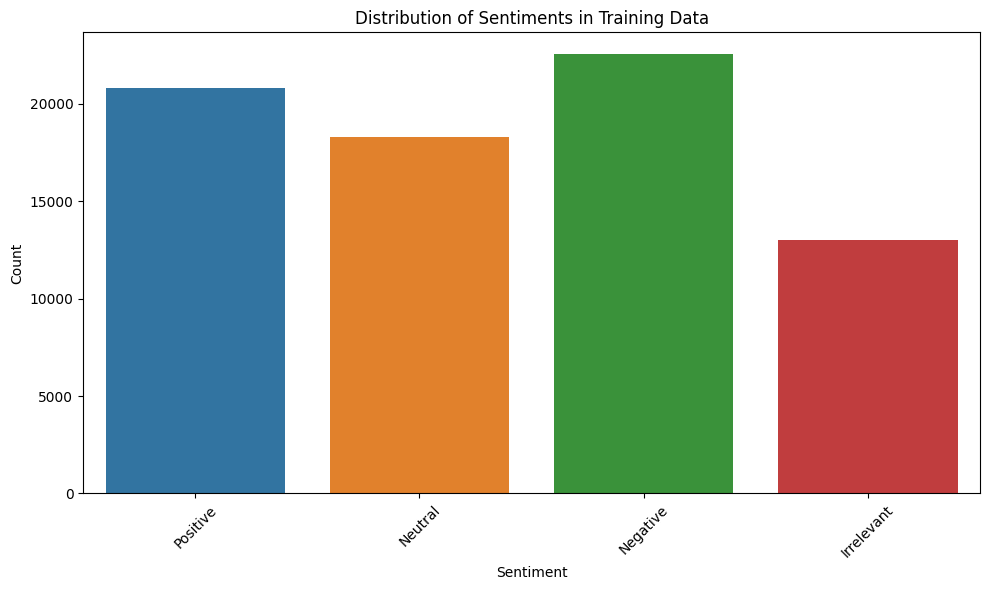

In [ ]:
# Plot the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='Positive', data=twitter_training_df)
plt.title('Distribution of Sentiments in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

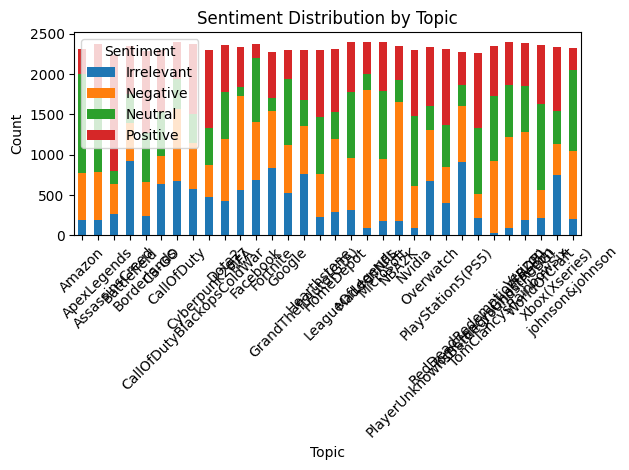

In [ ]:
# Group the data by topic and sentiment to see the distribution
sentiment_by_topic = twitter_training_df.groupby(['Borderlands', 'Positive']).size().unstack(fill_value=0)

# Plot the distribution of sentiments across different topics
plt.figure(figsize=(14, 8))
sentiment_by_topic.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()